**目次**<a id='toc0_'></a>    
- 1. [科学技術計算6課題](#toc1_)    
  - 1.1. [課題06-1：目的関数の作成](#toc1_1_)    
  - 1.2. [課題06-2：準ニュートン法の更新式の比較](#toc1_2_)    
  - 1.3. [課題06-3：非線形共役勾配法の実装](#toc1_3_)    
  - 1.4. [課題06-：勾配ベクトル場の可視化](#toc1_4_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 1. <a id='toc1_'></a>[科学技術計算6課題](#toc0_)

**各課題で共通する注意事項**

- 関数にはアノテーション（引数や返り値の型情報）と`docstring`（関数の説明文）を必ず書く．

## 1.1. <a id='toc1_1_'></a>[課題06-1：目的関数の作成](#toc0_)

演習資料では，最適化手法をテストするための目的関数$f(x)$をいくつか設定した．
この課題では，2次元の目的関数 $f(x, y)$ を自分で設定する．

**やること**

1. 資料中の `class NonConvexFunctionJax(FunctionJax)` を参考にして，自作の目的関数クラスを作成する．
   - `jax`を用いた自動微分を利用できるように，`FunctionJax`を継承して実装すること．
2. 可視化関数 `visualize_f()` を用いて，設定した目的関数を描画する．

**クラス定義**

```python
class AnotherNonConvexFunctionJax(FunctionJax):
    def forward(self, x: jnp.ndarray) -> float:
```


**注意点**

* 自動微分には必ず`jax`を用いること．
* 授業資料中の関数`NonConvexFunctionJax()` のように，数個の局所極小点や局所極大点を持つ関数が望ましい．
  * 多数の極値を持つような複雑な関数は，アルゴリズムの比較に適していない．
  * なだらかな関数曲面を持ち，どこに収束するのか直感的に分かるような関数にすること．
* 描画範囲は `visualize_f()` のデフォルト（$x, y \in [-10, 10]$）とし，その範囲に少なくとも1つ極小点を持つように設計すること．


**実行手順**

1. 作成したクラスをインスタンス化し，`visualize_f()` を実行して関数の形状を確認する．
2. 勾配やヘッセ行列が自動微分により正しく計算されているかを確認する．



## 1.2. <a id='toc1_2_'></a>[課題06-2：準ニュートン法の更新式の比較](#toc0_)

演習資料では，ヘッセ行列の近似$B$を更新するBFGSを紹介した．
しかし，準ニュートン法には，他にもいくつかの更新式やバリエーションが存在する．

まず，更新方法には大きく2通りある．

- ヘッセ行列 $B$ を近似して更新する場合
  - $B^{(k)} \boldsymbol{d}^{(k)} = -\nabla f(\boldsymbol{x}^{(k)})$を解いて$\boldsymbol{d}^{(k)}$を求める（つまり$\boldsymbol{d}^{(k)} = - (B^{(k)})^{-1} \nabla f(\boldsymbol{x}^{(k)})$）
- ヘッセ行列の逆行列 $H$ を近似して更新する場合
  - $\boldsymbol{d}^{(k)} = - H^{(k)} \nabla f(\boldsymbol{x}^{(k)})$

それぞれに対して以下の3種類の更新式が知られている．

- [BFGS](https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm)：Broyden–Fletcher–Goldfarb–Shanno公式
- [DFP](https://en.wikipedia.org/wiki/Davidon%E2%80%93Fletcher%E2%80%93Powell_formula)：Davidon–Fletcher–Powell公式
- [SR1](https://en.wikipedia.org/wiki/Symmetric_rank-one)：Symmetric Rank one公式
- 参考：https://en.wikipedia.org/wiki/Quasi-Newton_method

よって，合計で6通りの組み合わせがある．
演習資料では「$B$を更新するBFGS法」を実装したが，この課題では残りの5通りも含めて実装と比較を行う．

**やること**

- 6つの更新式を調べて，関数として実装する．
  - ただし6つの関数を作成する必要はない．同じ関数を，呼び出す引数を変えるだけですむ実装にすること．
    - BFGSとDFPは双対の関係にあり，$B$と$H$の場合で数式が同じである．したがってBFGSとDFPの4通りについては，作成する関数は2つでよい．
    - SR1は$B$と$H$の場合で数式が同じである．したがってSR1の2通りについては，作成する関数は1つでよい．
- 演習資料の関数`def quasi_newton_method()` を参考にして，準ニュートン法を実装する．
    - `scipy.optimize.line_search()`を用いて直線探索を実行すること．
    - 引数 `method` で更新式（"BFGS", "DFP", "SR1"）を選べるようにする．
    - 引数 `update` で「ヘッセ行列$B$を更新する」か「逆行列$H$を更新する」かを切り替えられるようにする．

**関数定義**

```python
def quasi_newton(
        f: callable,
        g: callable,
        x0: np.ndarray,
        update: str,  # "B" or "H"
        method: str,  # "BFGS", "DFP", "SR1"
        maxiter: int,
        callback: callable,
) -> np.ndarray:
```

**実行手順**

- 目的関数には，以下の2つを用いる．
  - 演習資料中の`NonConvexFunction()`
  - 課題06-1で作成した目的関数
- 6通りの更新方法（B/H × BFGS, DFP, SR1）について，`CacheXk`を用いてそれぞれ解系列を記録し，`PlotCacheXk`を用いて1つの図にプロットする．
  - 収束の速さや軌跡を比較し，差異を観察する（収束の速さや安定性に違いがあるか，初期値依存性が強い更新式はどれか，などについて）．
- 初期値を変えて，同様に比較する．


## 1.3. <a id='toc1_3_'></a>[課題06-3：非線形共役勾配法の実装](#toc0_)

授業資料の非線形共役勾配法の実装ではステップサイズ$\alpha$は固定だった．
この課題では，固定ステップサイズを直線探索に置き換える改良を行い，直線探索を導入した場合と導入しない場合の収束の違いを比較する．


**やること**

1. 非線形共役勾配法の実装（`def conjugate_gradient()`）を改変し，固定ステップサイズ $\alpha$ を直線探索に変更する．
   - 直線探索には `scipy.optimize.line_search()` を用いること．
   - 引数`with_ls`で直線探索の有無を切り替えられるようにする．

**関数定義**

```python
def conjugate_gradient_ls(
        f: callable,
        g: callable,
        x0: np.ndarray,
        alpha: float,
        with_ls: bool,
        maxiter: int,
        callback: callable,
) -> np.ndarray:
```

**実行手順**

- 直線探索あり・なしで，それぞれ2つ以上の異なる初期値を用いる．
- `CacheXk`と`PlotCacheXk`を用いて解の系列を同一プロットに表示し，収束の様子を比較する．
    - 目的関数は`NonConvexFunction()`と，上記課題06-1で作成した目的関数の2つ

**実行手順**

- 目的関数には，以下の2つを用いる．
  - 演習資料中の`NonConvexFunction()`
  - 課題06-1で作成した目的関数
- 直線探索あり・なしの2種類の実装について，`CacheXk`を用いてそれぞれ解系列を記録し，`PlotCacheXk`を用いて1つの図にプロットする．
  - 収束の速さや軌跡を比較し，差異を観察する．
- 初期値を変えて，同様に比較する．


## 1.4. <a id='toc1_4_'></a>[課題06-4：勾配ベクトル場の可視化](#toc0_)

与えられた2変数関数$f(x, y)$の負の勾配ベクトル（つまり最急降下方向）を，
格子点$(x, y)$上で矢印ベクトル場として可視化する．

**やること**

1. 格子点$(x, y)$を一定範囲に設定し，各点における目的関数$f(x,y)$の勾配ベクトル$\nabla f(x, y)$を求める．
   1. 勾配ベクトルを反転したものが最急降下方向である．
2. 勾配ベクトル場を矢印ベクトルとして描画する．
   1. 目的関数$f(x, y)$の等高線を併せて描画し，負の勾配ベクトルが最急降下方向を表していることを確認する．


**実行手順**

- `np.meshgrid()`を用いて，$x, y \in [-10, 10]$ の範囲で格子点を生成する．
-  `matplotlib.pyplot.quiver()` を用いて，ベクトル場を描画する．
   - 勾配ベクトルは適切にスケーリングして表示し，ベクトル場が見やすくなるようにすること．
- `plt.contour()` を用いて等高線を描画し，勾配ベクトルの方向と等高線の関係を観察する．
    - 勾配は常に等高線に直交することを確認する．
- 同様の手順で，ニュートンステップ（つまり$-H^{-1} \nabla f$）をベクトル場として可視化し，勾配ベクトル場と比較する．

以下は可視化の例である．

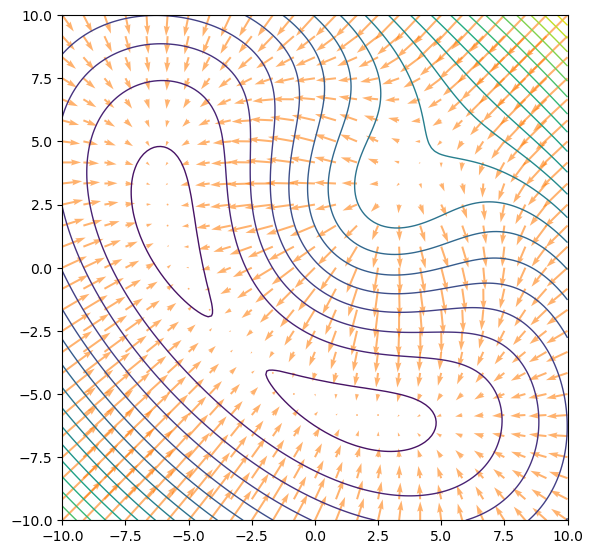